In [12]:
# File:			Project2.py
# Author: 		Ying Zhang
# Date: 		3/06/2016
# Course:		CMSC 471
# E-mail:		yzhang3@umbc.edu
# Description:  Implementation of hill climbing, hill climbing with random restarts,
#               and simulated annealing.
# Reference:    https://en.wikipedia.org/wiki/Simulated_annealing
#               https://docs.python.org/2/library/random.html
#               http://matplotlib.org/examples/mplot3d/surface3d_demo3.html
#               http://ipython.readthedocs.org/en/stable/interactive/plotting.html
#               http://matplotlib.org/users/pyplot_tutorial.html
#               https://en.wikibooks.org/wiki/LaTeX/Mathematics

In [13]:
%matplotlib inline

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import random
import itertools

In [15]:
def function (X, Y):
    
    R = np.sqrt(X**2 + Y**2)
    Z = (np.sin(X**2 + 3*(Y**2))/(0.1 + R**2)) + ((X**2 + 5*(Y**2))*(np.exp(1-R**2)/2))
    
    return Z

In [16]:
def get_neighbors(x, y, step_size):
    
    coors = []
    
    coors.append((x+step_size, y))
    coors.append((x-step_size, y))
    coors.append((x+step_size, y+step_size))
    coors.append((x+step_size, y-step_size))
    coors.append((x-step_size, y+step_size))
    coors.append((x-step_size, y-step_size))
    coors.append((x, y+step_size))
    coors.append((x, y-step_size))
    
    return coors

In [17]:
def hill_climb(function_to_optimize, step_size, xmin, xmax, ymin, ymax):
    
    currentX = random.uniform(xmin, xmax)
    currentY = random.uniform(ymin, ymax)
    flag = True
    minPath = []
    counter = 0

    currentMin = function_to_optimize(currentX, currentY)
    
    while (flag):
        neighbors = get_neighbors(currentX, currentY, step_size)
        prevMin = currentMin
        
        # find the Z value of all neighbors and compare them
        for i in neighbors:
            # ensure that the search does not go out of bound
            if ((-2.5 <= i[0]) and (i[0] <= 2.5) and (-2.5 <= i[1]) and (i[1] <= 2.5)):
                tempMin = function_to_optimize(i[0], i[1])
                if (tempMin < currentMin):
                    currentMin = tempMin
                    currentX = i[0]
                    currentY = i[1]
                    minPath.append((currentX, currentY, currentMin))
                
        if (prevMin == currentMin):
            flag = False
                 
    return currentMin, minPath

In [18]:
def hill_climb_random_restart(function_to_optimize, step_size, num_restarts, xmin, xmax, ymin, ymax):
    
    restart = num_restarts
    currMin = 999
    path = []
    
    while (restart != 0):
        tempMin, tempPath = hill_climb(function_to_optimize, step_size, xmin, xmax, ymin, ymax)
        if (tempMin < currMin):
            currMin = tempMin
            path = tempPath
        
        restart-=1
    
    return currMin, path

In [19]:
def simulated_annealing(function_to_optimize, step_size, max_temp, xmin, xmax, ymin, ymax):
    
    currentX = random.uniform(xmin, xmax)
    currentY = random.uniform(ymin, ymax)
    currentMin = function_to_optimize(currentX, currentY)
    T = max_temp
    path = []

    for i in itertools.count(1, 0.1):
        T = T*(0.99**i)
        #when T is zero, then the search is complete
        if (T == 0):
            return currentMin, path
        
        neighbors = get_neighbors(currentX, currentY, step_size)
        rand = random.randint(0, 7)
        nextState = neighbors[rand]
        
        #ensure that the search does not go out of bound
        while ((nextState[0] <= -2.5) or (nextState[0] >= 2.5) 
               or (nextState[1] <= -2.5) or (nextState[1] >= 2.5)):
            rand = random.randint(0, 7)
            nextState = neighbors[rand]
            
        tempMin = function_to_optimize(nextState[0], nextState[1])
        dE = currentMin - tempMin
        prob = np.exp(dE/T)
        
        #when their difference is greater than 0, then the currentMin is greater than tempMin
        if (dE > 0):
            currentX = nextState[0]
            currentY = nextState[1]
            currentMin = tempMin
            path.append((currentX, currentY, currentMin))
        #probability of accepting a "bad“ move
        elif (prob >= random.uniform(0, 1)):
            currentX = nextState[0]
            currentY = nextState[1]
            currentMin = tempMin
            path.append((currentX, currentY, currentMin))
    
    return currentMin, path

In [20]:
def display_graph(function_to_optimize, path):
    
    xValues, yValues, zValues = [], [], []
    
    for item in path:
        xValues.append(item[0])
        yValues.append(item[1])
        zValues.append(item[2])

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.arange(-3, 3, 0.25)
    xlen = len(X)
    Y = np.arange(-3, 3, 0.25)
    ylen = len(Y)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = function_to_optimize(X, Y)

    colortuple = ('w', 'w')
    colors = np.empty(X.shape, dtype=str)
    for y in range(ylen):
        for x in range(xlen):
            colors[x, y] = colortuple[(x + y) % len(colortuple)]

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
                           linewidth=0, antialiased=False)
    
    ax.set_zlim3d(-1, 1)
    ax.w_zaxis.set_major_locator(LinearLocator(6))
    ax.plot(xValues, yValues, zValues,'-')

    plt.show()
    

In [21]:
def main():
    
    hillClimbMin,hillClimbPath = hill_climb(function, 0.01, -2.5, 2.5, -2.5, 2.5)
    print("hillClimbMin = ", hillClimbMin)
    
    randomRestartMin, randomRestartPath = hill_climb_random_restart(function, 0.01, 500, -2.5, 2.5, -2.5, 2.5)
    print("hillClimbMinRandomRestartMin = ", randomRestartMin)
    
    SAMin, SAPath = simulated_annealing(function, 0.01, 35, -2.5, 2.5, -2.5, 2.5)
    print("SAMin = ", SAMin)
    
    display_graph(function, hillClimbPath)
    display_graph(function, randomRestartPath)
    display_graph(function, SAPath)  

hillClimbMin =  -0.150269542401
hillClimbMinRandomRestartMin =  -0.150271162158
SAMin =  -0.122217259444


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in exp
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in double_scalars


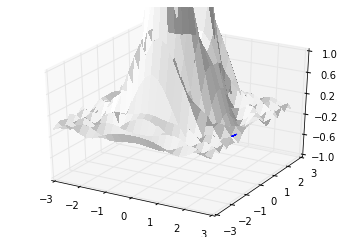

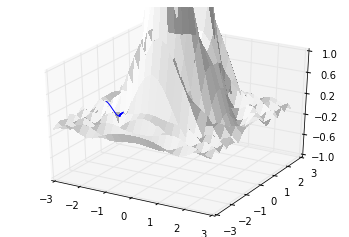

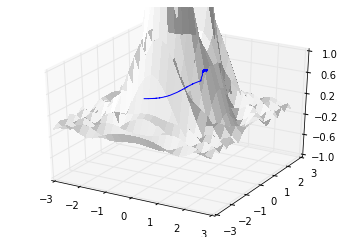

In [22]:
main()